<a href="https://colab.research.google.com/github/Manikanta898/Unsupervised-ML---Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member**    - Manikanta Tangi

# **Project Summary -**

In this unsupervised machine learning project, the objective is to develop a model capable of clustering diverse types of data from a dataset of Netflix shows. The dataset consists of 7787 entries distributed across 12 columns, including show_id (show identifier), type (movie or TV show), title, cast, country (show's origin), date added (to Netflix), release_year, rating, duration (show length), listed_in (genre categorization), and description (show summary).This project involves exploring and visualizing a dataset of Netflix content to identify trends and patterns. Hypotheses will be formulated based on these insights and tested for validation. Data preprocessing tasks will address missing values, outliers, and imbalanced data to ensure dataset quality. Finally, the dataset will be split into training and testing sets to build and evaluate clustering models aimed at categorizing Netflix shows into meaningful clusters based on their attributes.

# **GitHub Link -**

https://github.com/mani-github2021/Unsupervised-ML---Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


The goal of this project is to explore and analyze the dataset of TV shows and movies available on Netflix. The analysis aims to uncover insights about the content available on Netflix, trends in TV shows and movies, and other patterns that can inform business decisions.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
path='/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(path, on_bad_lines='skip')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Calculate the count of missing values for each column
missing_count = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine both into a DataFrame
missing_info = pd.DataFrame({
    'Missing Values Count': missing_count,
    'Missing Values Percentage': missing_percentage
})

# Display the result
print(missing_info)

              Missing Values Count  Missing Values Percentage
show_id                          0                   0.000000
type                             0                   0.000000
title                            0                   0.000000
director                      2389                  30.679337
cast                           718                   9.220496
country                        507                   6.510851
date_added                      10                   0.128419
release_year                     0                   0.000000
rating                           7                   0.089893
duration                         0                   0.000000
listed_in                        0                   0.000000
description                      0                   0.000000


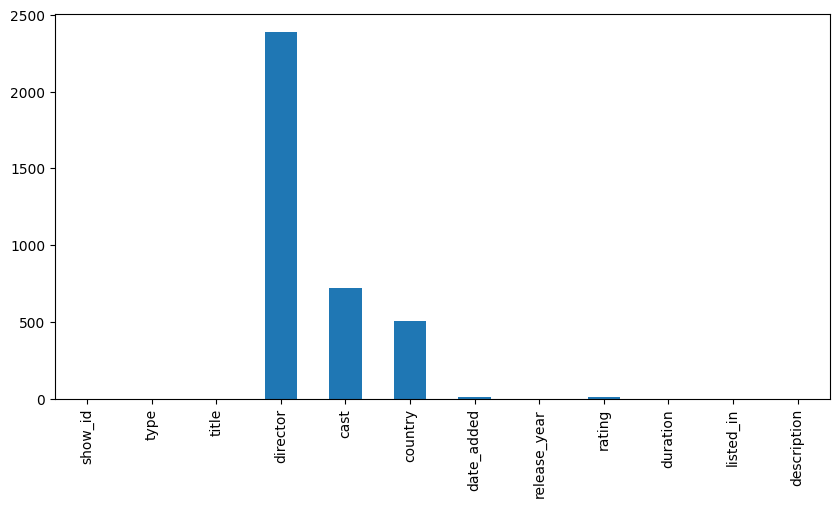

In [ ]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (10,5)
df.isna().sum().plot.bar()
plt.show()

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

These are the variables in the dataset:

Show_id: Show ID

Type: Type of the show (e.g., movie or TV show)

Title: Title of the show

Director: Director of the show

Cast: Actors and actresses of the show

Country: Country of origin of the show

Date_added: Date when the show was added to Netflix

Release_year: Release year

Rating: Rating of the show

Duration: Duration of the show

Listed_in: Categories the show is listed in

Description: Description of the show

### Check Unique Values for each variable.

In [ ]:
# Checking Unique Values for each variable.
for col in df.columns:
    print(f"Number of unique value for {col} is : {len(df[col].unique())}")

Number of unique value for show_id is : 7787
Number of unique value for type is : 2
Number of unique value for title is : 7787
Number of unique value for director is : 4050
Number of unique value for cast is : 6832
Number of unique value for country is : 682
Number of unique value for date_added is : 1566
Number of unique value for release_year is : 73
Number of unique value for rating is : 15
Number of unique value for duration is : 216
Number of unique value for listed_in is : 492
Number of unique value for description is : 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Handling missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unrated', inplace=True)

# Converting date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extracting month and year from date_added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

# Separating duration into minutes and seasons
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df.loc[df['type'] == 'TV Show', 'duration_type'] = 'Seasons'
df.loc[df['type'] == 'Movie', 'duration_type'] = 'Minutes'

# Checking the updated dataframe
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,duration_num,duration_type
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8.0,2020.0,4.0,Seasons
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12.0,2016.0,93.0,Minutes
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12.0,2018.0,78.0,Minutes
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0,80.0,Minutes
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,123.0,Minutes


In [ ]:
# Calculating total length for each type of duration (Movies and TV Shows)
total_duration = df.groupby('duration_type')['duration_num'].sum()
total_duration

,duration_num
duration_type,
Minutes,533979.0
Seasons,4280.0


In [ ]:
# Calculating total number of shows added for each month
total_shows_per_month = df.groupby('month_added')['show_id'].count()
total_shows_per_month

,show_id
month_added,
1.0,746
2.0,466
3.0,661
4.0,596
5.0,537
6.0,538
7.0,592
8.0,612
9.0,614


In [ ]:
# Calculating total number of movies added for each month
total_movies_per_month = df[df['type'] == 'Movie'].groupby('month_added')['show_id'].count()
total_movies_per_month

,show_id
month_added,
1.0,560
2.0,328
3.0,471
4.0,420
5.0,371
6.0,377
7.0,403
8.0,414
9.0,415


In [ ]:
# Calculating total number of TV shows added for each month
total_tvshows_per_month = df[df['type'] == 'TV Show'].groupby('month_added')['show_id'].count()
total_tvshows_per_month

,show_id
month_added,
1.0,186
2.0,138
3.0,190
4.0,176
5.0,166
6.0,161
7.0,189
8.0,198
9.0,199


In [ ]:
# top 5 actors
top_5_actors = df['cast'].str.split(', ').explode().value_counts().head(5)
# top 5 genres
top_5_genres = df['listed_in'].str.split(', ').explode().value_counts().head(5)

In [ ]:
# Top 5 actors with the highest number of shows
top_actors = df['cast'].str.split(', ').explode().value_counts().head(5)
top_actors

,count
cast,
Unknown,718
Anupam Kher,42
Shah Rukh Khan,35
Om Puri,30
Naseeruddin Shah,30


In [ ]:
# Top 5 directors with the highest number of shows
top_directors = df['director'].value_counts().head(5)
top_directors

,count
director,
Unknown,2389
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13


In [ ]:
# Top 5 countries with the highest number of shows
top_countries = df['country'].value_counts().head(5)
top_countries

,count
country,
United States,2555
India,923
Unknown,507
United Kingdom,397
Japan,226


In [ ]:
# Top 5 years with the highest number of shows released
top_years = df['release_year'].value_counts().head(5)
top_years

,count
release_year,
2018,1121
2017,1012
2019,996
2016,882
2020,868


In [ ]:
# Top ratings with the highest number of shows
top_ratings = df['rating'].value_counts().head(5)
top_ratings

,count
rating,
TV-MA,2863
TV-14,1931
TV-PG,806
R,665
PG-13,386


### What all manipulations have you done and insights you found?

Handled Missing Values:

Filled missing values in director, cast, country, date_added, and rating with appropriate placeholders.

Converted Data Types:

Converted date_added to datetime format.

Extracted Additional Features:

Extracted month_added and year_added from date_added.
Separated duration into duration_num and added a new column duration_type to distinguish between minutes and seasons.

Directors with highest number of movies/tv shows are Raúl Campos and Jan Suter : 18

Top 5 countries produced highest number of movies are :

United States : 2555 India : 923 United Kingdom : 397 Japan : 226 South Korea : 183

Highest movies produced in year 2018 : 1121

Rating for highest number of movie is TV-MA : 2863

Top 5 actors with highest number of movies are :

Anupam Kher : 42 Shah Rukh Khan : 35 Naseeruddin Shah : 30 Om Puri : 30 Akshay Kumar : 29

Top genres with highest number of movies are :
International Movies : 2437 Dramas : 2106

Total Seasons : 4280 and Total Minutes : 533979.

Number of TV Shows/Movies for each month

December : 833

October : 785

January : 757

November : 738

March : 669

September : 619

August : 618

April : 601

July : 600

May : 543

June : 542

February : 472

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

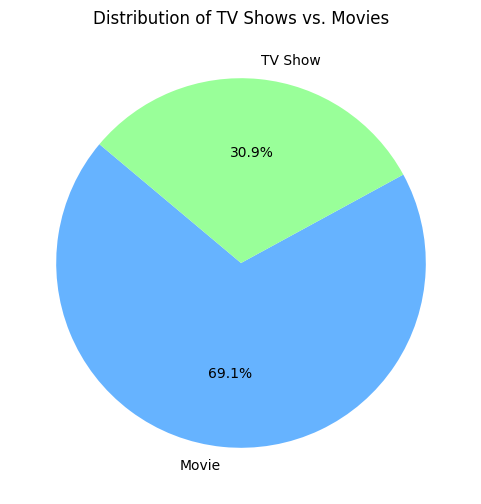

In [ ]:
# Chart - 1 : visualization code
type_counts = df['type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'], startangle=140)
plt.title('Distribution of TV Shows vs. Movies')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are used to visually represent the proportion of different categories within a whole.This chart shows percentage of TV shows and movies the in dataset.

##### 2. What is/are the insight(s) found from the chart?

69% share for TV shows shows that people are watching more series than movies, likely because of the rise of streaming platforms and a preference for longer, more engaging content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can help Netflix understand its content composition, enabling better content strategy and investment decisions. If there is a significant imbalance, it might indicate the need for more TV shows or movies to attract and retain subscribers.


#### Chart - 2

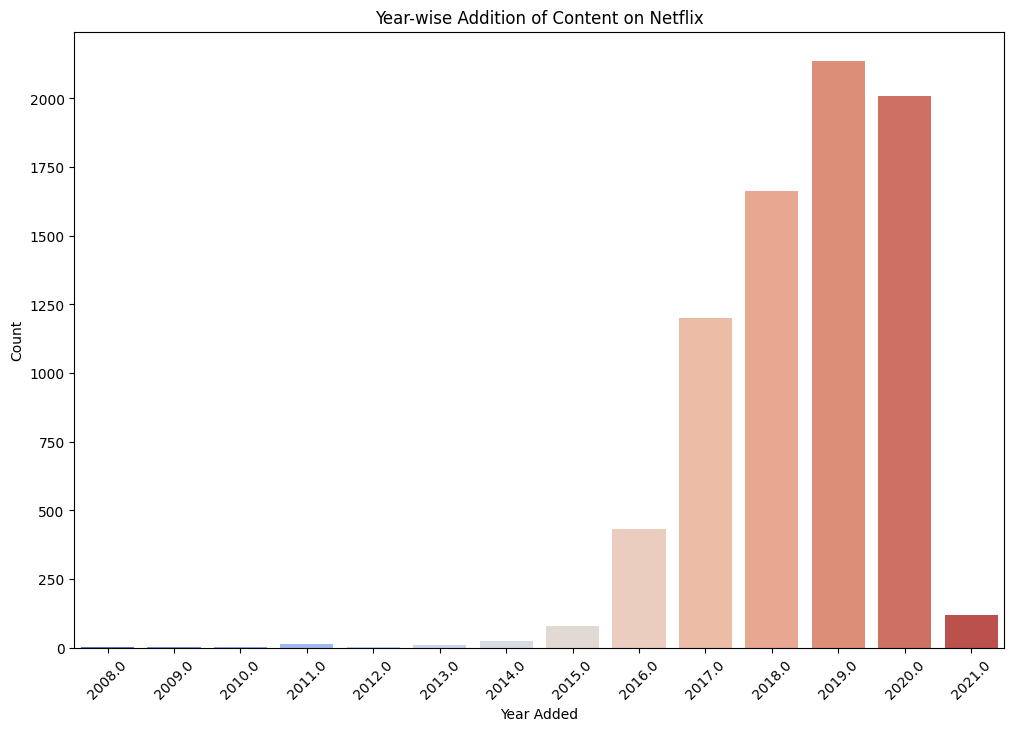

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='year_added', palette='coolwarm')
plt.title('Year-wise Addition of Content on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A count plot visualizes the number of occurrences of each category in a dataset. This chart shows how much data is added year wisely.

##### 2. What is/are the insight(s) found from the chart?

I found, in the year 2019, maximum of content added on netflix

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart reveals which years saw the most content added, indicating periods of rapid content growth.


#### Chart - 3

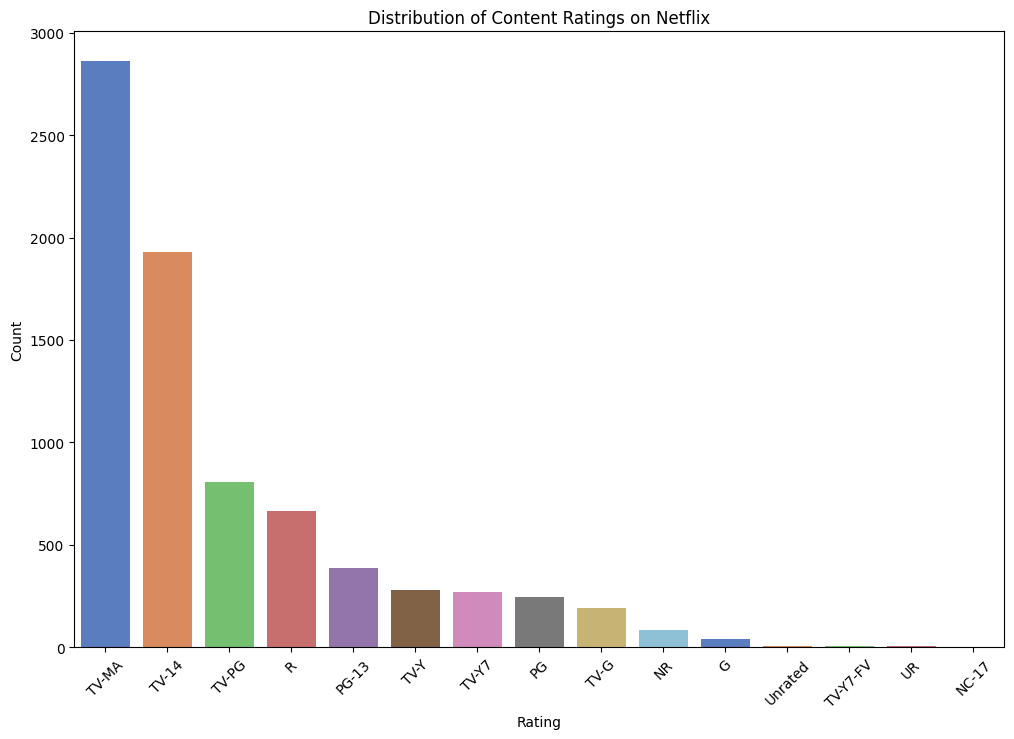

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='rating', palette='muted', order=df['rating'].value_counts().index)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A count plot visualizes the number of occurrences of each category in a dataset. This chart shows distribution of Content Ratings

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Netflix primarily targets mature audiences with a high proportion of TV-MA content, while NC-17 content is rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This strategy may boost retention among mature viewers but could limit appeal to younger or more conservative audiences, potentially restricting growth.

#### Chart - 4

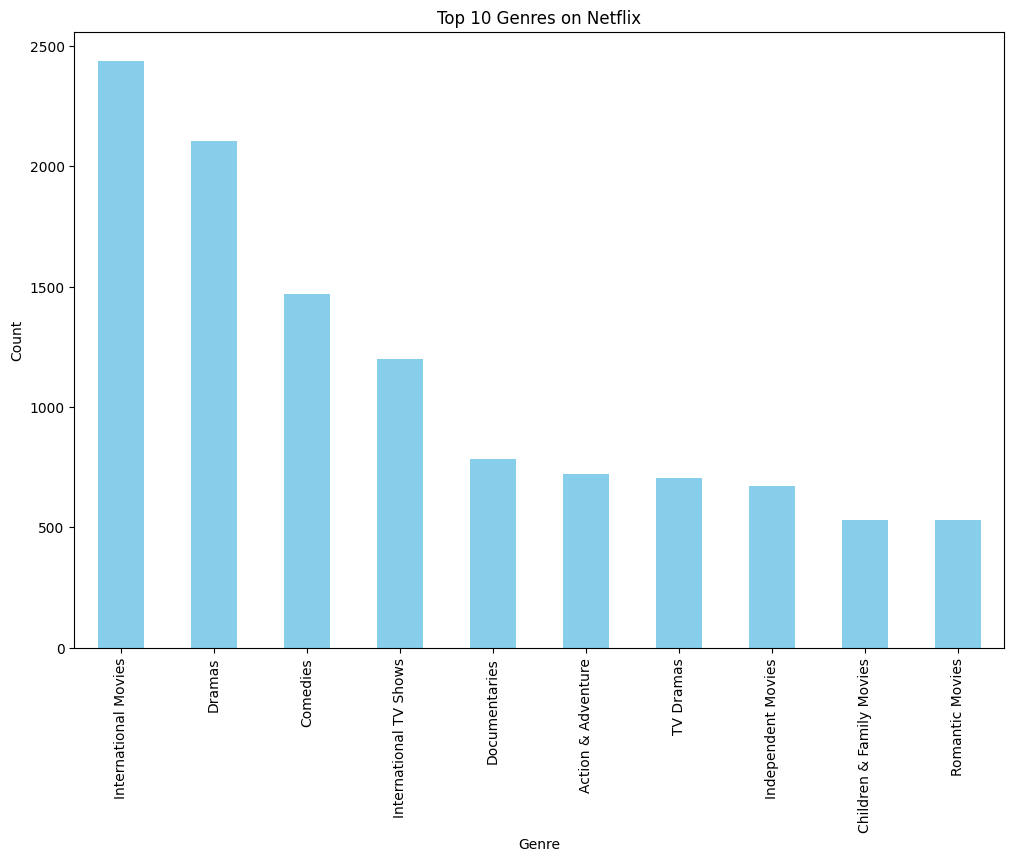

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(12,8))
top_genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)
top_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart compares quantities across categories for easy visual analysis.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that International Movies have the highest count, while Romantic Movies are the least represented on Netflix

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Focusing on International Movies could attract a global audience, increasing subscriptions, while the low representation of Romantic Movies may limit appeal to fans of that genre, affecting potential growth.

#### Chart - 5

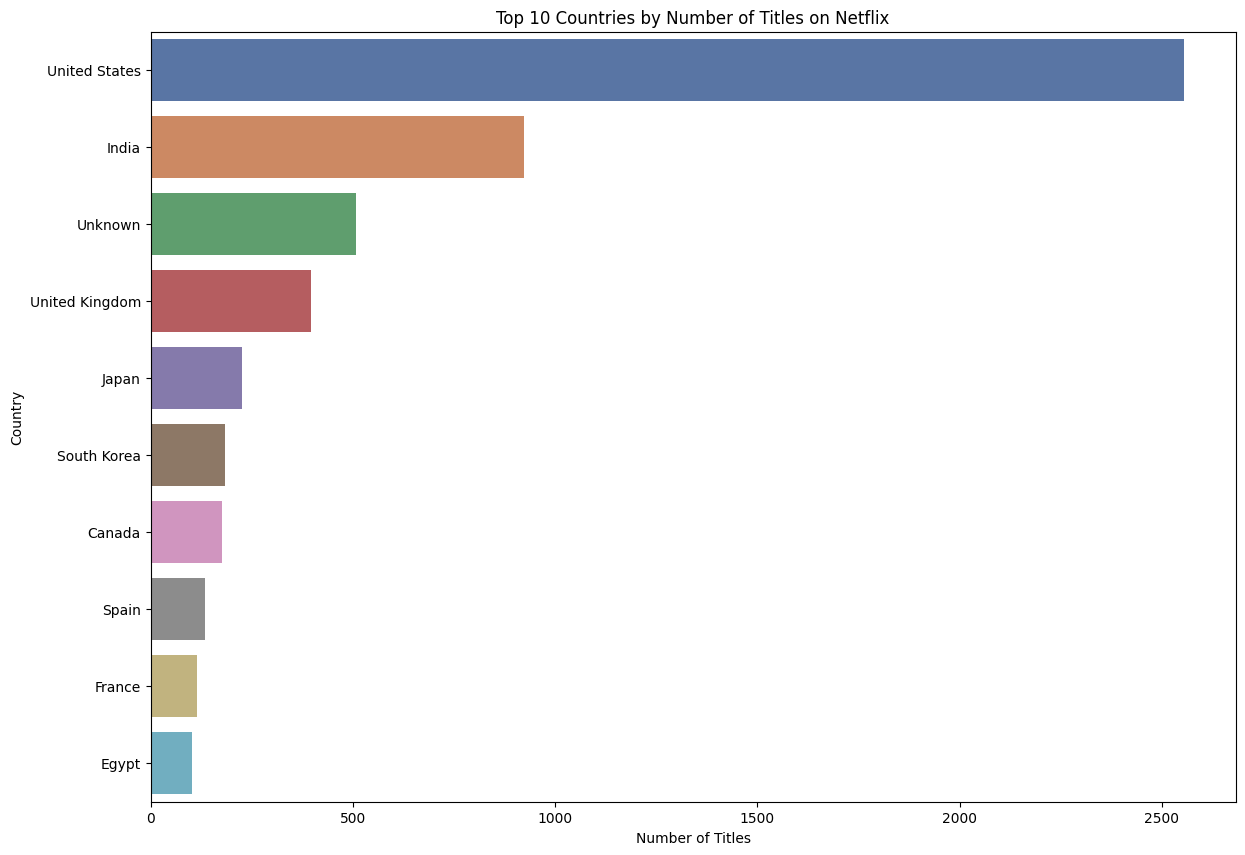

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(14,10))
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='deep')
plt.title('Top 10 Countries by Number of Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar plot displays categories with horizontal bars, making comparisons easy.

##### 2. What is/are the insight(s) found from the chart?

The United States has the most titles, while Egypt has the fewest on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

More titles in the US can drive subscriptions, but fewer titles in Egypt may limit growth in that market.

#### Chart - 6

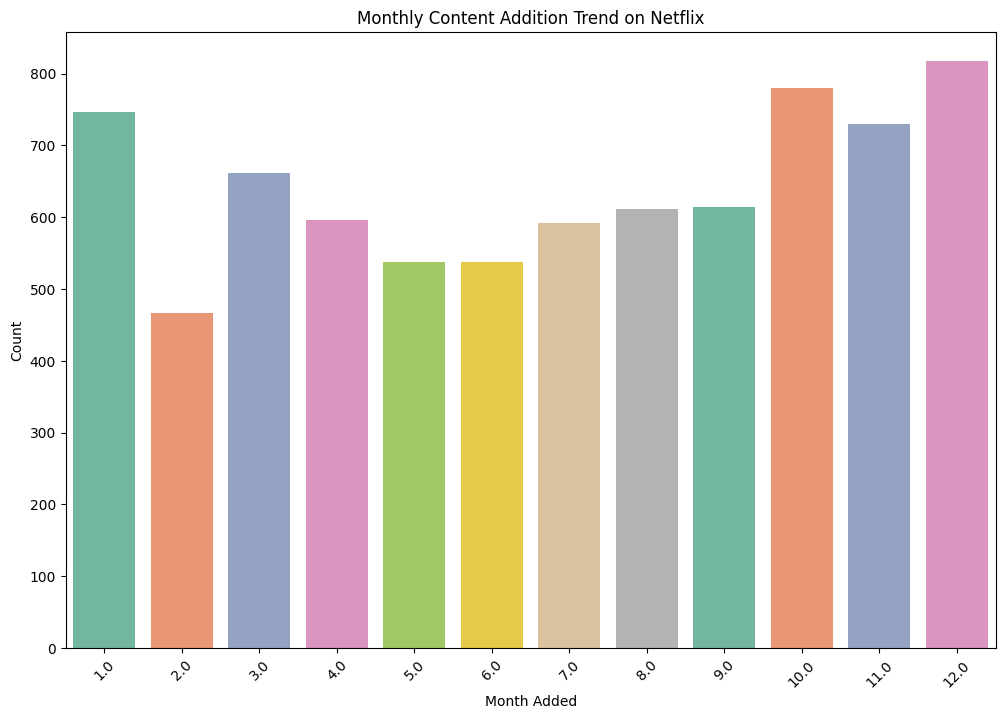

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='month_added', palette='Set2')
plt.title('Monthly Content Addition Trend on Netflix')
plt.xlabel('Month Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A count plot visualizes the number of occurrences of each category in a dataset. This chart shows

##### 2. What is/are the insight(s) found from the chart?

December sees the highest content addition, while February has the lowest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High December content boosts engagement, but February's low addition may cause churn if unaddressed.


#### Chart - 7

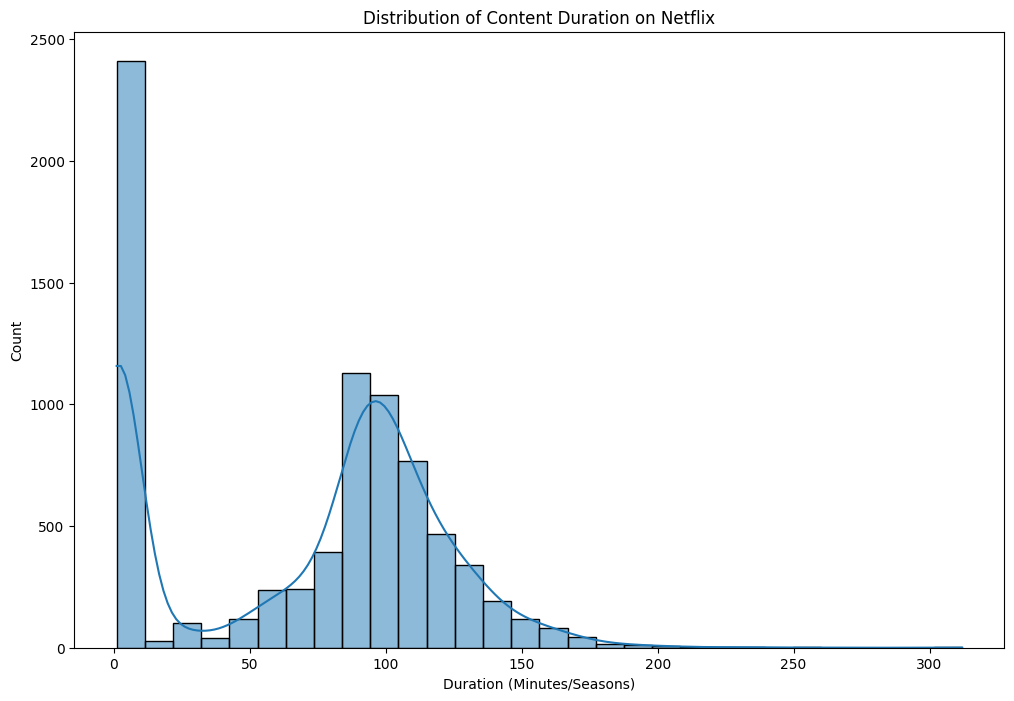

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='duration_num', bins=30, kde=True)
plt.title('Distribution of Content Duration on Netflix')
plt.xlabel('Duration (Minutes/Seasons)')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A histplot shows the distribution of data by displaying frequencies of values within specified bins.

##### 2. What is/are the insight(s) found from the chart?

Majority content is short (0-100 mins) and very few long-format shows (>150 mins)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The content is positive and varied, catering to different viewer preferences. However, having a lot of short videos may slightly affect the total watch time.

#### Chart - 8

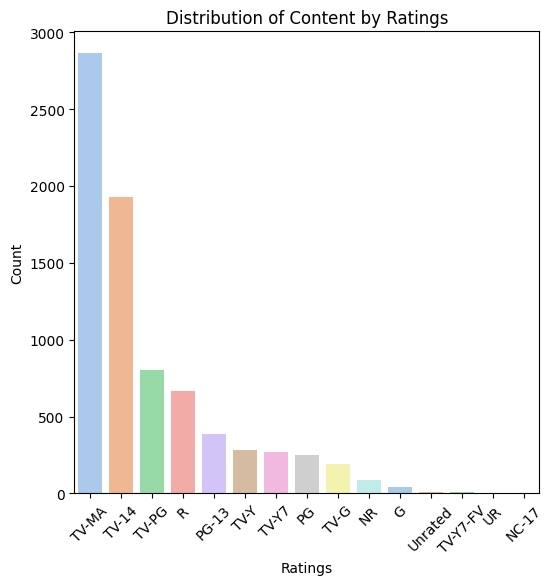

In [ ]:
# Chart - 8 visualization code
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="pastel")
plt.title('Distribution of Content by Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart compares quantities across categories for easy visual analysis.

##### 2. What is/are the insight(s) found from the chart?

Most shows are for adults (TV-MA) and teens (TV-14), with very few kids' shows

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Adult content selection attracts mature audiences but limited family/children content could restrict subscriber growth across demographics

#### Chart - 9 - Correlation Heatmap

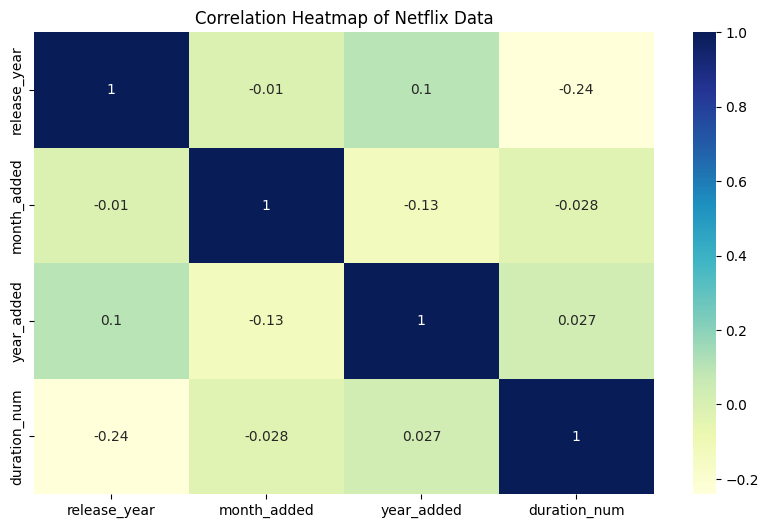

In [ ]:
# Correlation Heatmap visualization code
# Converting date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Selecting only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Creating a correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap of Netflix Data")
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap visualizes data values through color intensity, revealing patterns and correlations in a matrix format.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a moderate negative correlation between release year and duration (-0.24), with other correlations being weak or negligible.

#### Chart - 10 - Pair Plot

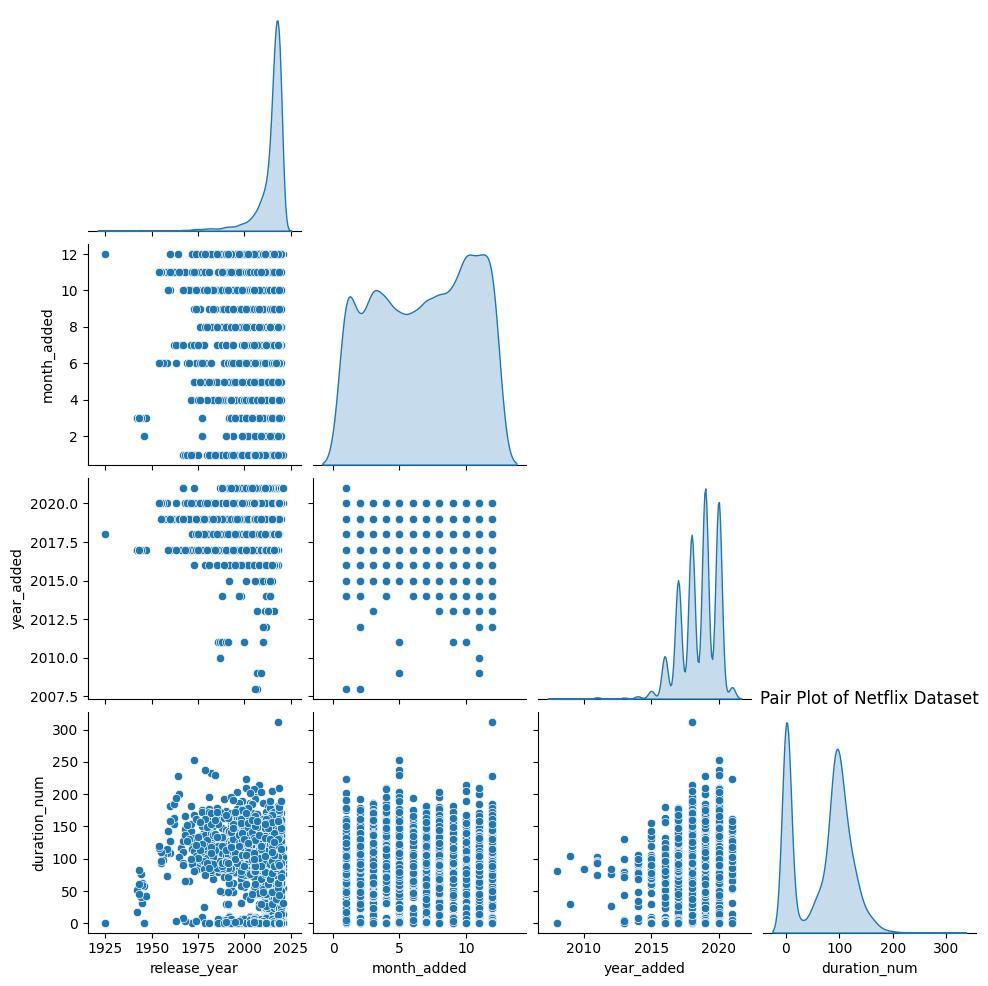

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, diag_kind='kde', corner=True)
plt.title('Pair Plot of Netflix Dataset')
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot displays pairwise relationships between multiple variables in a dataset, helping to identify correlations and distributions.

##### 2. What is/are the insight(s) found from the chart?

* Most content is added in recent years, with a significant spike in additions around 2018-2020.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The average duration of movies on Netflix is 90 minutes.

Alternate Hypothesis (H₁ or Ha): The average duration of movies on Netflix is not 90 minutes.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Filter the dataset for movies
movies_data = df[df['type'] == 'Movie']

# Perform one-sample t-test
from scipy.stats import ttest_1samp

# Null hypothesis value
hypothesized_mean = 90

# Calculate the t-test
t_stat, p_value = ttest_1samp(movies_data['duration_num'].dropna(), hypothesized_mean)

t_stat, p_value


(np.float64(23.922700720669887), np.float64(2.8291472375708075e-120))

##### Which statistical test have you done to obtain P-Value?

One-sample t-test

##### Why did you choose the specific statistical test?

This test compares the mean of a single sample to a known value. Since the p-value is extremely small, we reject the null hypothesis. This indicates that the average duration of movies on Netflix is not 90 minutes.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The proportion of TV shows rated TV-MA is equal to the proportion of movies rated TV-MA.

Alternate Hypothesis (H1): The proportion of TV shows rated TV-MA is different from the proportion of movies rated TV-MA.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Create a contingency table
contingency_table = pd.crosstab(df['type'], df['rating'] == 'TV-MA')

# Perform chi-square test
from scipy.stats import chi2_contingency

chi2, p_value, _, _ = chi2_contingency(contingency_table) # _ , _ because we donot need dof, expected

chi2, p_value


(np.float64(44.64785497701877), np.float64(2.3585584654400838e-11))

##### Which statistical test have you done to obtain P-Value?

 Chi-square test for independence

##### Why did you choose the specific statistical test?

This test is appropriate for comparing proportions in categorical data. Since the p-value is very small, we reject the null hypothesis. This suggests that the proportion of TV shows rated TV-MA is significantly different from the proportion of movies rated TV-MA.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no difference in the average number of seasons between TV shows added before 2015 and those added after 2015.

Alternate Hypothesis (H1): There is a difference in the average number of seasons between TV shows added before 2015 and those added after 2015.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Filter the dataset for TV shows
tv_shows_data = df[df['type'] == 'TV Show']

# Create two groups based on the year_added
group1 = tv_shows_data[tv_shows_data['year_added'] < 2015]['duration_num'].dropna()
group2 = tv_shows_data[tv_shows_data['year_added'] >= 2015]['duration_num'].dropna()

# Perform independent samples t-test
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

t_stat, p_value


(np.float64(2.581082060771554), np.float64(0.0295554313796823))

##### Which statistical test have you done to obtain P-Value?

Independent samples t-test

##### Why did you choose the specific statistical test?

This test compares the means of two independent groups to determine if there is a significant difference between them. Since the p-value is less than 0.05, we reject the null hypothesis. This suggests that there is a significant difference in the average number of seasons between TV shows added before and after 2015.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df_copy = df.copy()
df_copy['director'].fillna('Unknown', inplace=True)
df_copy['cast'].fillna('Unknown', inplace=True)
df_copy['country'].fillna('Unknown', inplace=True)
df_copy['date_added'].fillna('Unknown', inplace=True)
df_copy['rating'].fillna(df_copy['rating'].mode()[0], inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Fill Missing Values with 'Unknown': For categorical columns such as director, cast, and country, filling with 'Unknown' ensures that no data is lost and these entries can still be analyzed.

Date Imputation: For date_added, missing values were filled with 'Unknown' and later converted to datetime. If a more accurate date is needed, missing values can be filled using forward/backward fill based on the context.

Mode Imputation: For rating, filling missing values with the most frequent value ensures consistency in analysis.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
from scipy import stats

# Detect outliers
z_scores = stats.zscore(df_copy['duration_num'].dropna())
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=0)

# Capping outliers
df_copy.loc[~filtered_entries, 'duration_num'] = df_copy['duration_num'].quantile(0.99)
df_copy.loc[df_copy['duration_num'] < df_copy['duration_num'].quantile(0.01), 'duration_num'] = df_copy['duration_num'].quantile(0.01)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Z-Score Method: For numerical columns like duration_num, outliers are detected using the z-score method and treated by capping them at the 1st and 99th percentiles to reduce their impact.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding
le = LabelEncoder()
df_copy['type'] = le.fit_transform(df_copy['type'])

# One-Hot Encoding
data = pd.get_dummies(df_copy, columns=['rating', 'country'], drop_first=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Label Encoding: For binary categorical columns such as type.

One-Hot Encoding: For multi-category columns such as rating and country to avoid ordinal relationships.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
# Combining the textual columns and assigning it to a new variable
df_copy['combined_text'] = (df_copy['cast']+' '+df_copy['listed_in']+' '+' '+df_copy['description'])

#### 2. Lower Casing

In [ ]:
# Function to convert text to lowercase
def convert_to_lowercase(text):
    # Check if the text is a string before applying lower()
    if isinstance(text, str):
        return text.lower()
    else:
        # Handle non-string values (e.g., float)
        return str(text).lower()  # Convert to string and then apply lower()

df_copy['combined_text'] = df_copy['combined_text'].apply(convert_to_lowercase)

#### 3. Removing Punctuations

In [ ]:
# Function to remove punctuations
import string

def remove_punctuation(text):
    # Check if the text is a string, if not convert to string
    if not isinstance(text, str):
        text = str(text)
    return ''.join([char for char in text if char not in string.punctuation])

df_copy['combined_text'] = df_copy['combined_text'].apply(remove_punctuation)

#### 4. Removing URLs & Removing words contain digits.

In [ ]:
# Function to remove digits from the text
def remove_digits(text):
    return ''.join([char for char in text if not char.isdigit()])

df_copy['combined_text'] = df_copy['combined_text'].apply(remove_digits)

# Function to remove URLs
def remove_urls(text):
    return ' '.join([word for word in text.split() if 'http' not in word and 'www' not in word])

df_copy['combined_text'] = df_copy['combined_text'].apply(remove_urls)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
import nltk
nltk.download('stopwords')

# Function to remove stopwords
def remove_stopwords(text):
    stop_words = nltk.corpus.stopwords.words('english')
    return ' '.join([word for word in text.split() if word not in stop_words])

# Apply stopword removal
df_copy['combined_text'] = df_copy['combined_text'].apply(remove_stopwords)

# Function to remove extra whitespace
def remove_extra_whitespace(text):
    return ' '.join(text.split())

df_copy['combined_text'] = df_copy['combined_text'].apply(remove_extra_whitespace)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### 6. Tokenization (Vectorization)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to vectorize text
def vectorize_text(df_copy):
    vectorizer = CountVectorizer()
    vectorizer.fit_transform(df_copy['combined_text'])
    return vectorizer.vocabulary_

vectorized_dict = vectorize_text(df_copy)
print('Total Features:', len(vectorized_dict))

Total Features: 46370


#### 7. Text Normalization (Stemming)

In [ ]:
# Normalizing Text
from nltk.stem import SnowballStemmer

# Function for stemming text
def apply_stemming(text):
    stemmer = SnowballStemmer('english')
    return ' '.join([stemmer.stem(word) for word in text.split()])

df_copy['combined_text'] = df_copy['combined_text'].apply(apply_stemming)

# Re-run vectorization after stemming
vectorized_dict_after_stem = vectorize_text(df_copy)
print('Total Features After Stemming:', len(vectorized_dict_after_stem))

Total Features After Stemming: 39864


##### Which text normalization technique have you used and why?

I used Stemming, it removes endings from words, like changing 'coming' to 'come'.

#### 8. Text Vectorization

In [ ]:
# Vectorizing Text
# Function to get number from proportion
def proportionToNumber(proportion, data):
    return (proportion * data) / 100

num = int(round(proportionToNumber(1, len(df_copy)), 0))
# Vectorizing Text - discarding features which are available less than 1% of the dataset and more than 90%.
count_vectorizer = CountVectorizer(min_df=num, max_df=0.9)
features_array = count_vectorizer.fit_transform(df_copy['combined_text']).toarray()
features_names = count_vectorizer.get_feature_names_out()
df_copy.shape


# Making dataframe with vocabularies
X = pd.DataFrame(features_array, columns=features_names)
X.shape

(7788, 392)

##### Which text vectorization technique have you used and why?

I used CountVectorizer technique,because it counts word frequencies directly, which is sufficient for this task where raw counts matter more than adjusting for document frequency.

### 5. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Since there are many features with mostly zero values, we need to reduce the number of features to make the model more efficient.


In [ ]:
# DImensionality Reduction (If needed)
# Applying PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Reducing dimensions while retaining 97.5% variance
pca = PCA(n_components=0.975)
X_reduced = pca.fit_transform(X)

# Checking the shape of the transformed data
len(X_reduced[0])

353

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used principal component analysis, which reduces the dataset to fewer components while retaining a specified percentage of variance (97.5% in this case).

## ***7. ML Model Implementation***

### ML Model - 1

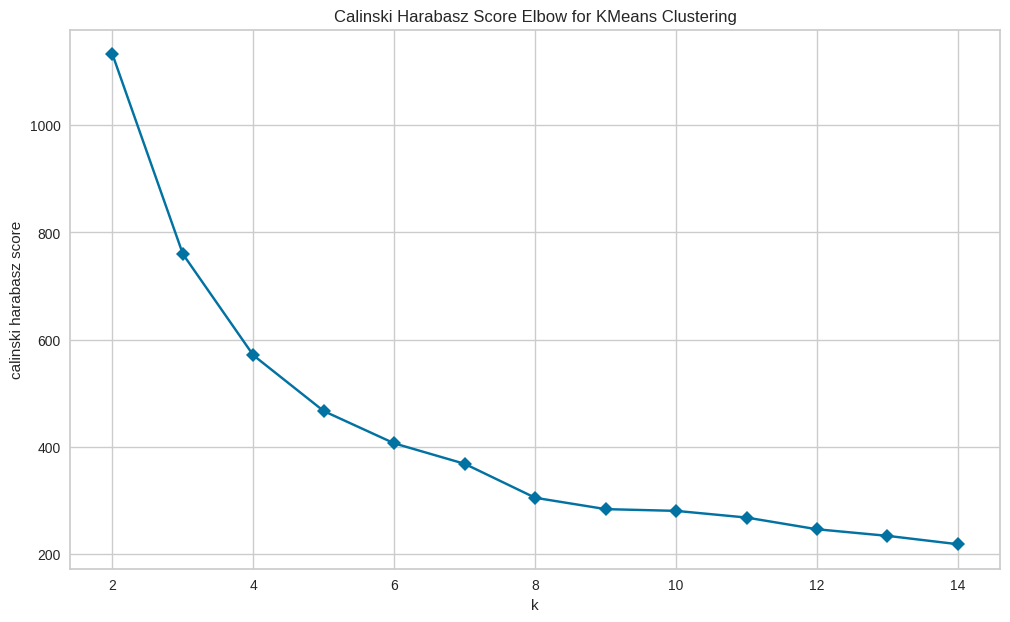

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# ML Model - 1 Implementation - KElbowVisualization
plt.rcParams['figure.figsize'] = (12,7)
model = KMeans(random_state=10)
visualizer = KElbowVisualizer(model,k=(2,15),metric='calinski_harabasz',timings=False,locate_elbow=False)
# Fit the Algorithm
visualizer.fit(X_reduced)
# Predict on the model
visualizer.show()
plt.show()

In [ ]:
# Function to display clusters
def plotClusters(data,cluster_labels,cluster_centers):
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, s=10, cmap='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=15)
    plt.show()

For 2 clusters, the silhouette score is 0.162425087104858


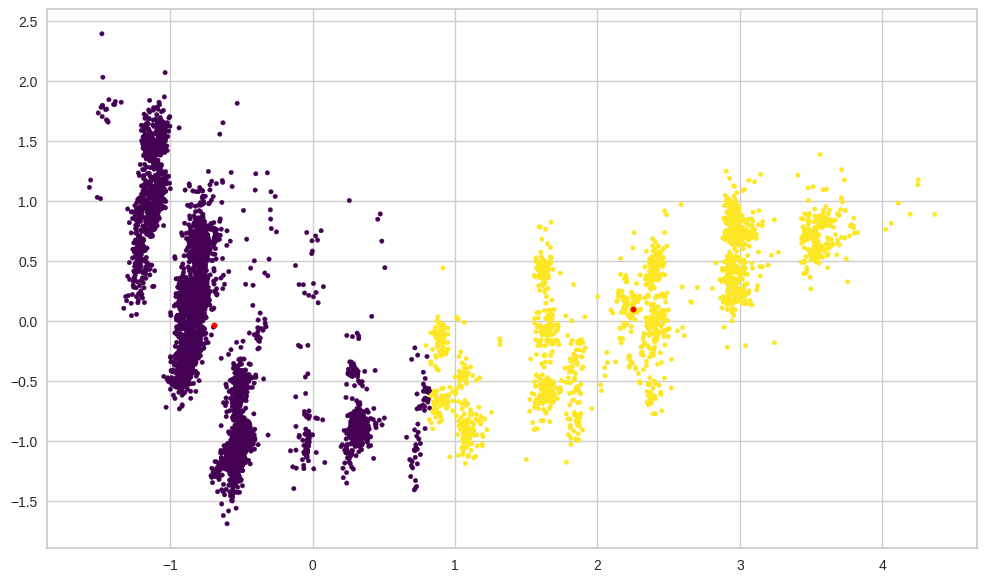

For 3 clusters, the silhouette score is 0.05686205520541699


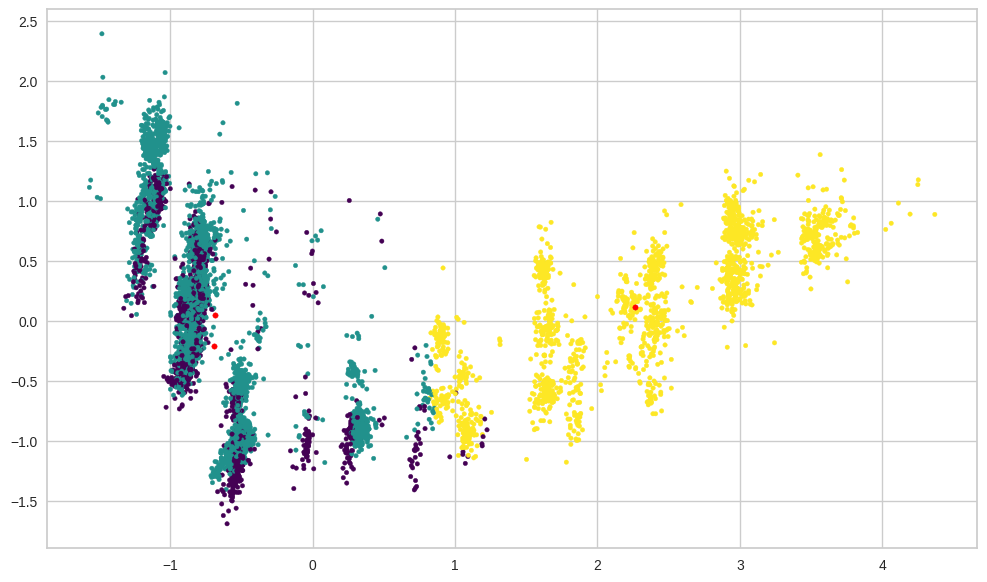

For 4 clusters, the silhouette score is 0.0590568657186835


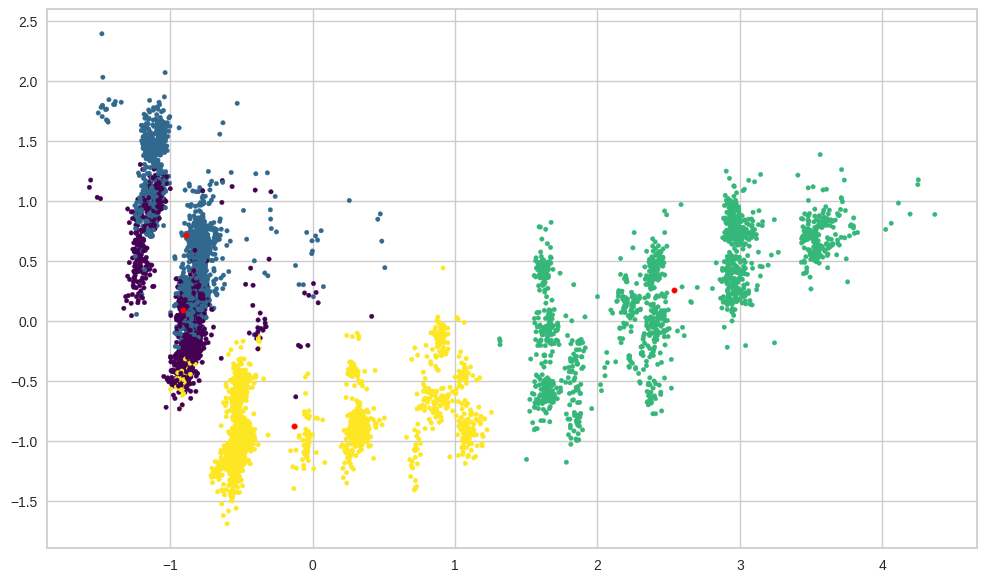

For 5 clusters, the silhouette score is 0.0406574021265096


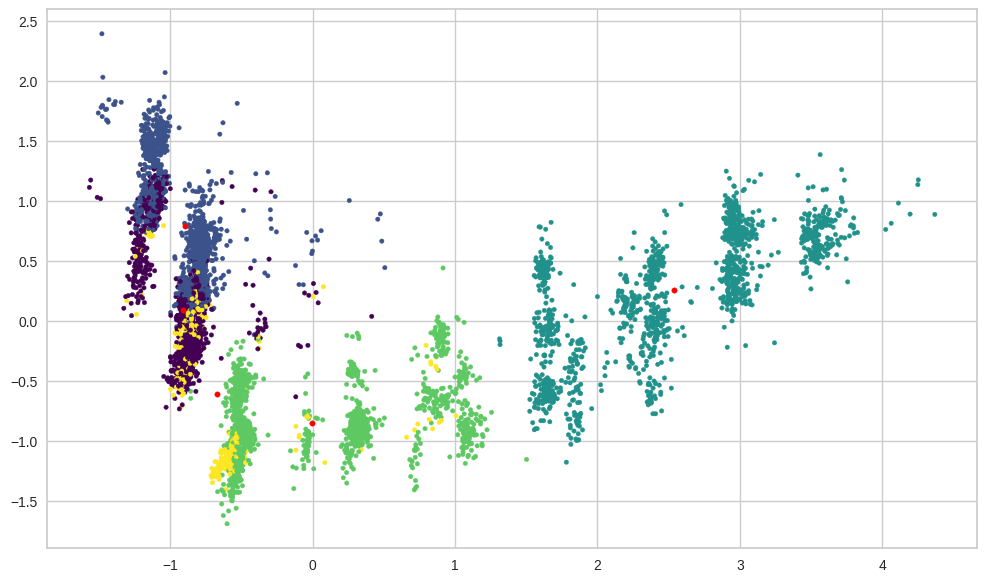

For 6 clusters, the silhouette score is 0.03368030442903223


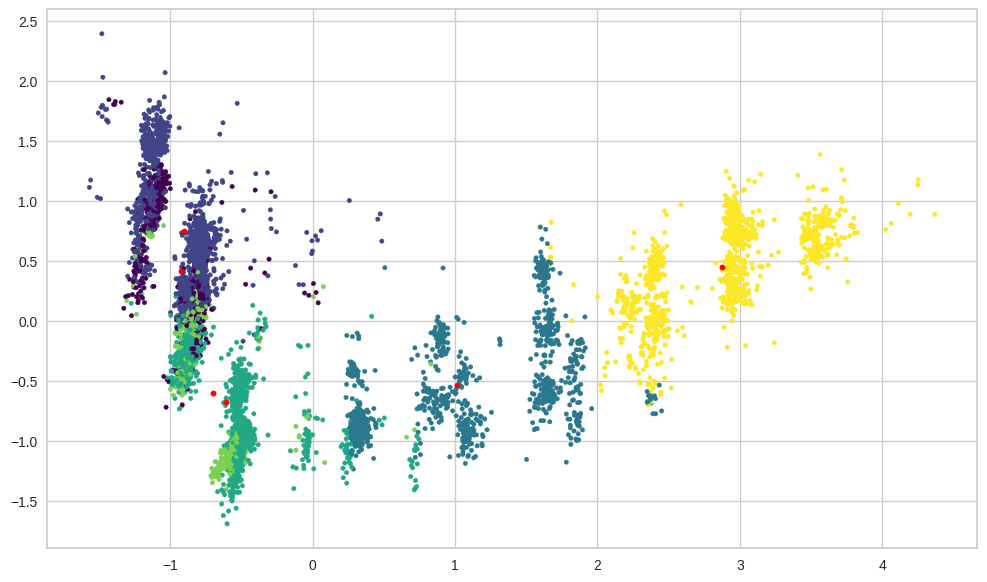

For 7 clusters, the silhouette score is 0.029126983898673253


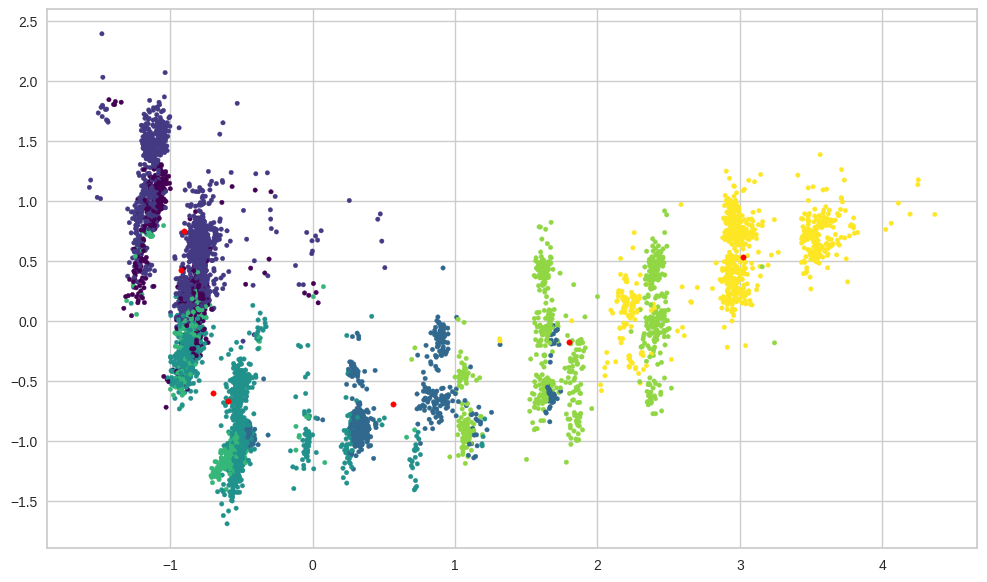

For 8 clusters, the silhouette score is 0.0475633920733829


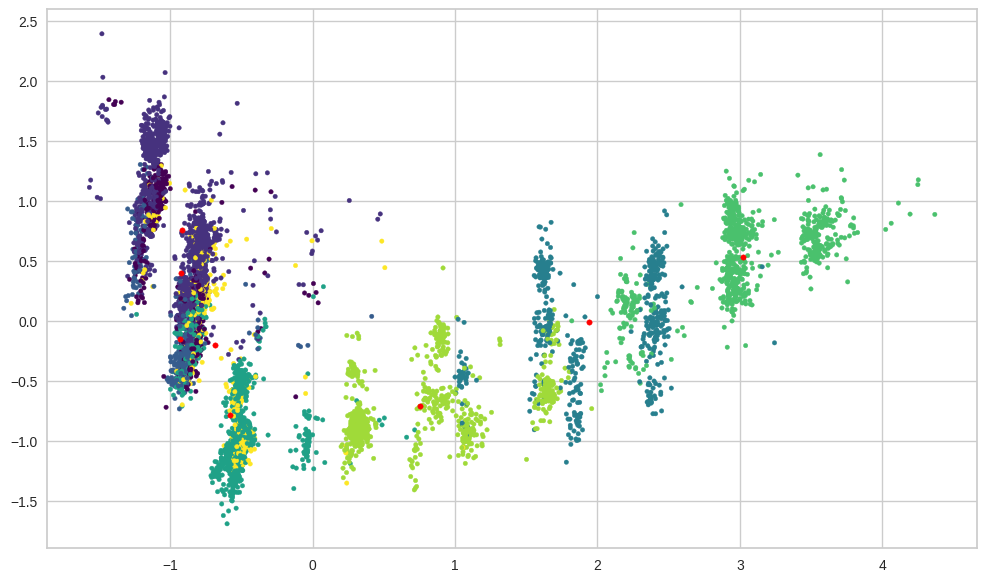

For 9 clusters, the silhouette score is 0.040960213303754135


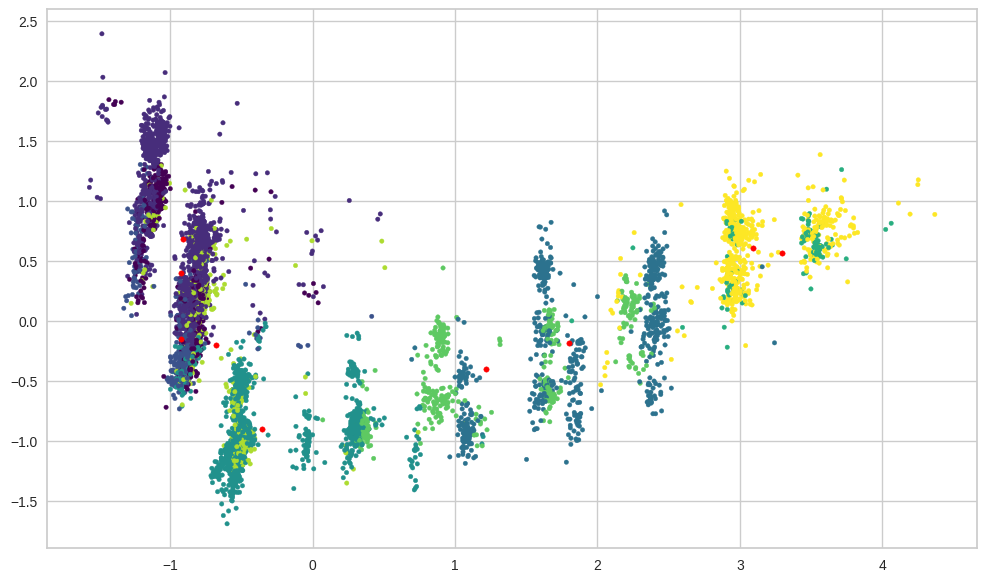

For 10 clusters, the silhouette score is 0.04487799112832959


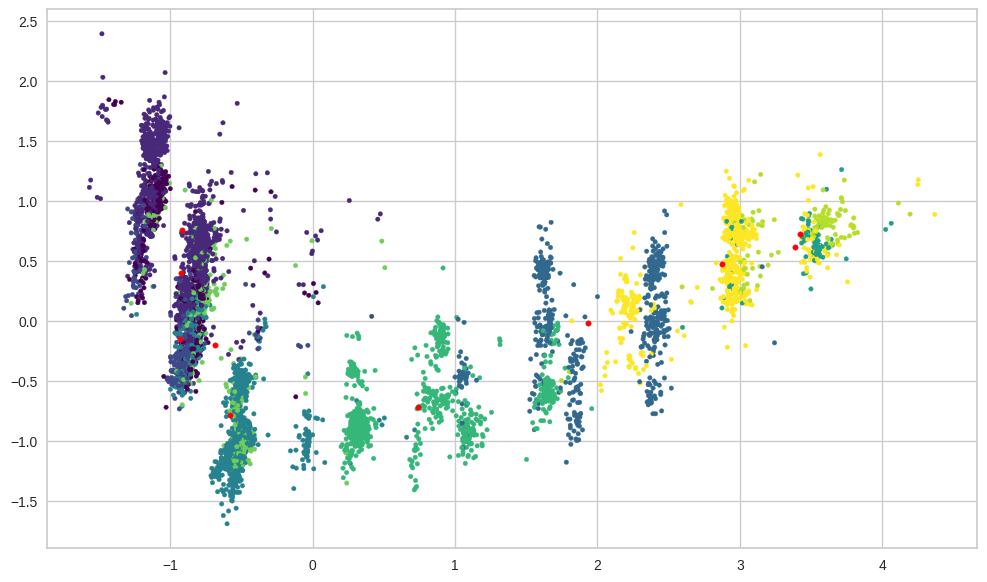

For 11 clusters, the silhouette score is 0.04824131982996999


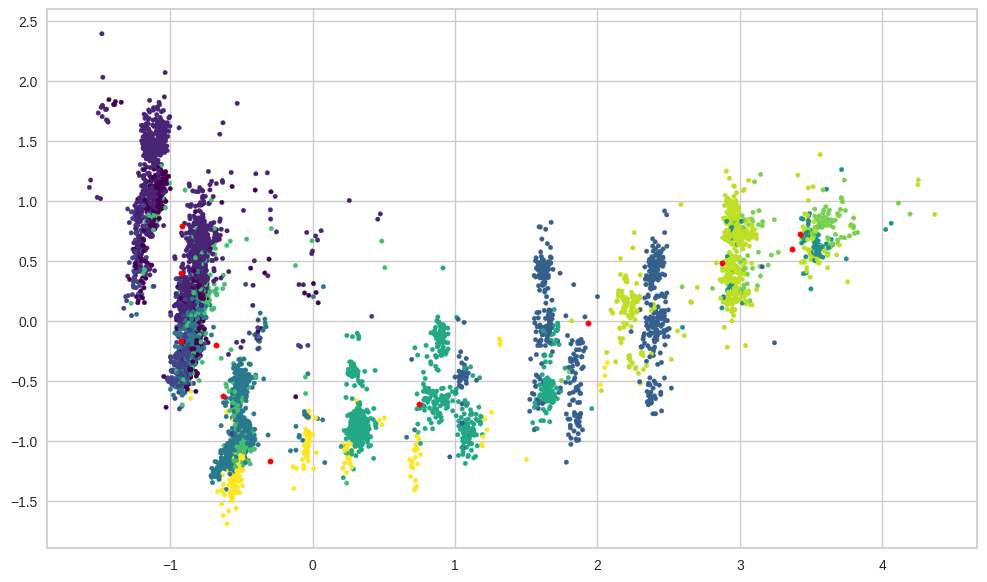

For 12 clusters, the silhouette score is 0.04746787485127809


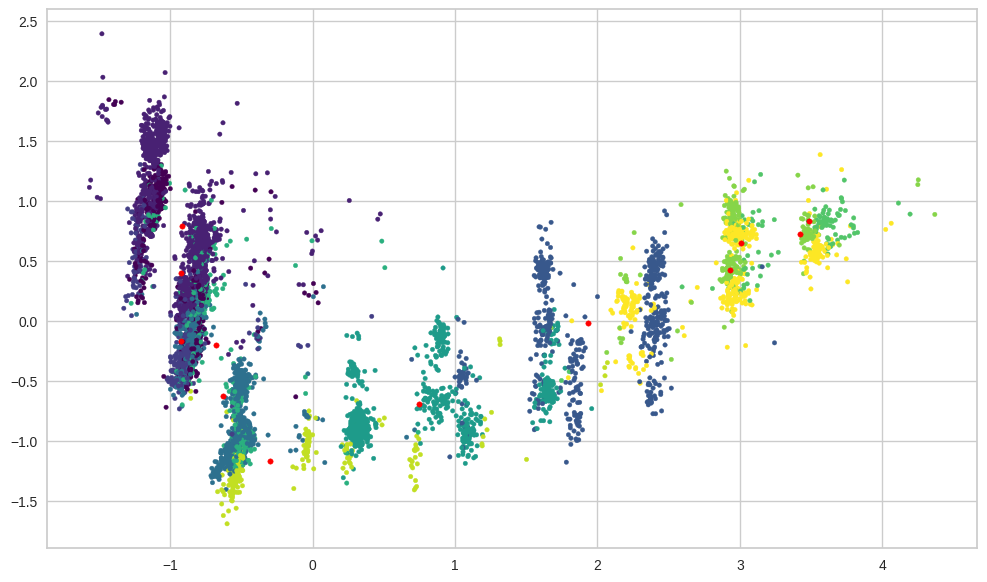

For 13 clusters, the silhouette score is 0.04293695454203962


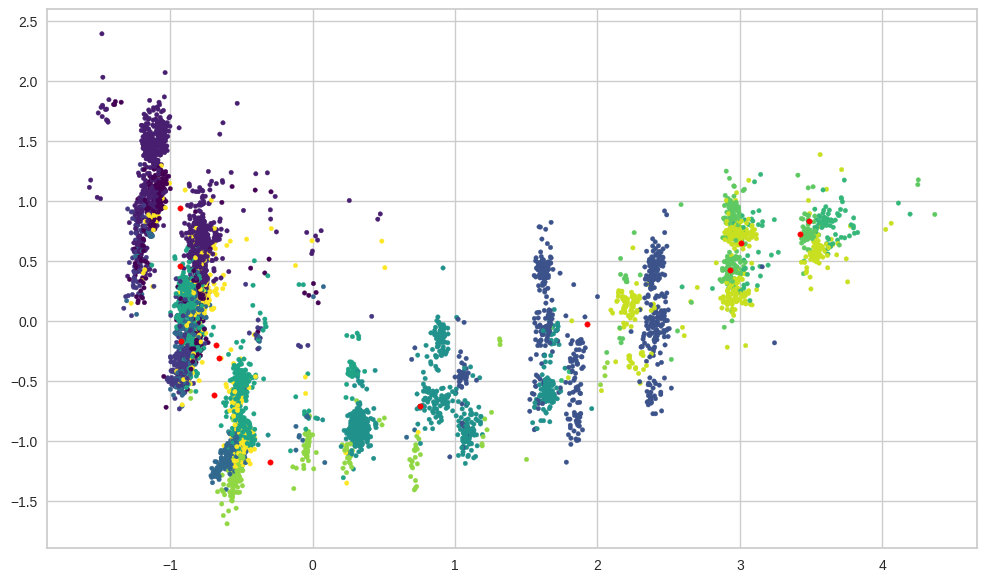

For 14 clusters, the silhouette score is 0.048748527783087955


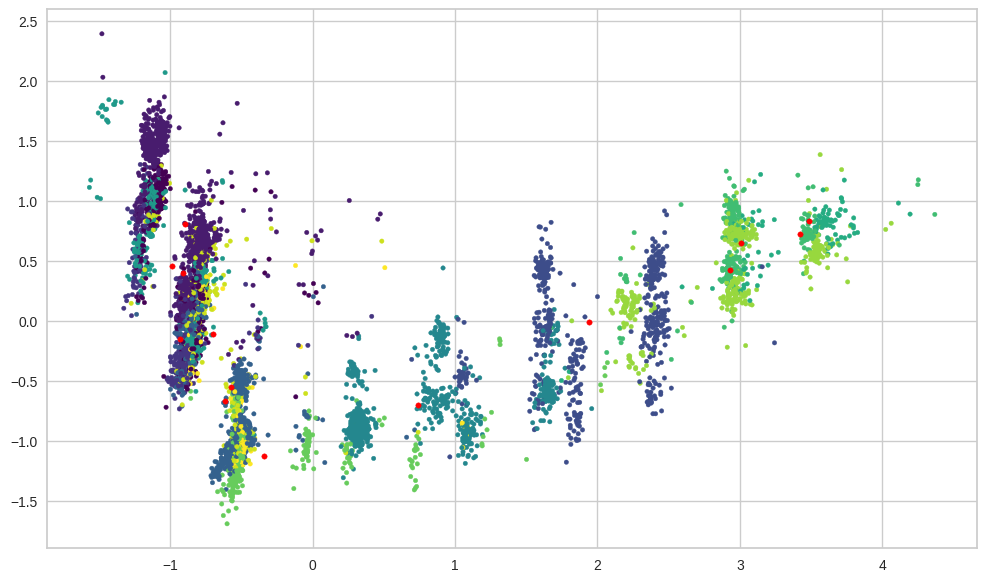

In [ ]:
# Silhouette Score for each cluster
from sklearn.metrics import silhouette_samples, silhouette_score
clusters_range = np.arange(2, 15)

for k in clusters_range:
    model = KMeans(n_clusters=k, random_state=42)
    predictions = model.fit_predict(X_reduced)
    centroids = model.cluster_centers_
    silhouette = silhouette_score(X_reduced, predictions)
    inertia_metric = model.inertia_
    print(f'For {k} clusters, the silhouette score is {silhouette}')

    # Plotting the results:
    plotClusters(X_reduced, predictions, centroids)

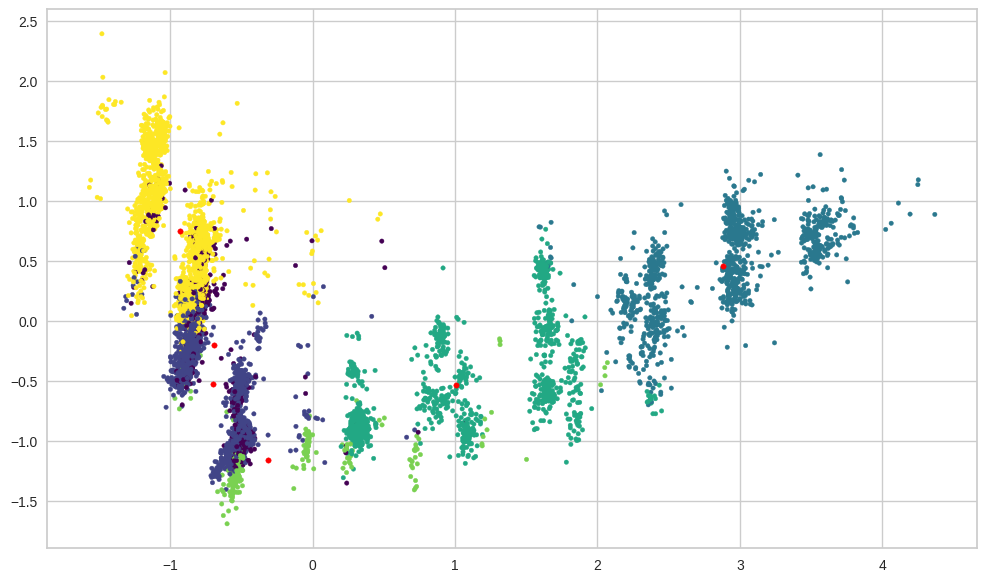

In [ ]:
# Silhouette score is good at 6 clusters therefore I am taking n_clusters = 6.
kmeans= KMeans(n_clusters=6, random_state=10,max_iter=100)
kmeans.fit(X_reduced)

# predict the labels of clusters.
labels = kmeans.fit_predict(X_reduced)
centers = kmeans.cluster_centers_
# plotting the results:
plotClusters(X_reduced,labels,centers)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

From KElbow visualization, I found that after n_clusters=6, the slope becomes nearly constant, and the silhouette score is relatively high at 0.046

In [ ]:
from sklearn.model_selection import GridSearchCV
# ML Model - 1 Implementation with hyperparameter optimization techniques
clustering_mdl = KMeans()
search_params = {'n_clusters':[6],'random_state':[10],'max_iter':[15,20],'tol':[.01,.1]}
grid_search = GridSearchCV(clustering_mdl, param_grid=search_params, verbose=2, cv=2)
# Fit the Algorithm
grid_search.fit(X_reduced)
# Predict on the model
best_model = grid_search.best_estimator_
cluster_labels = best_model.predict(X_reduced)
print(grid_search.best_params_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END max_iter=15, n_clusters=6, random_state=10, tol=0.01; total time=   0.2s
[CV] END max_iter=15, n_clusters=6, random_state=10, tol=0.01; total time=   0.2s
[CV] END max_iter=15, n_clusters=6, random_state=10, tol=0.1; total time=   0.2s
[CV] END max_iter=15, n_clusters=6, random_state=10, tol=0.1; total time=   0.3s
[CV] END max_iter=20, n_clusters=6, random_state=10, tol=0.01; total time=   0.4s
[CV] END max_iter=20, n_clusters=6, random_state=10, tol=0.01; total time=   0.3s
[CV] END max_iter=20, n_clusters=6, random_state=10, tol=0.1; total time=   0.2s
[CV] END max_iter=20, n_clusters=6, random_state=10, tol=0.1; total time=   0.2s
{'max_iter': 15, 'n_clusters': 6, 'random_state': 10, 'tol': 0.01}


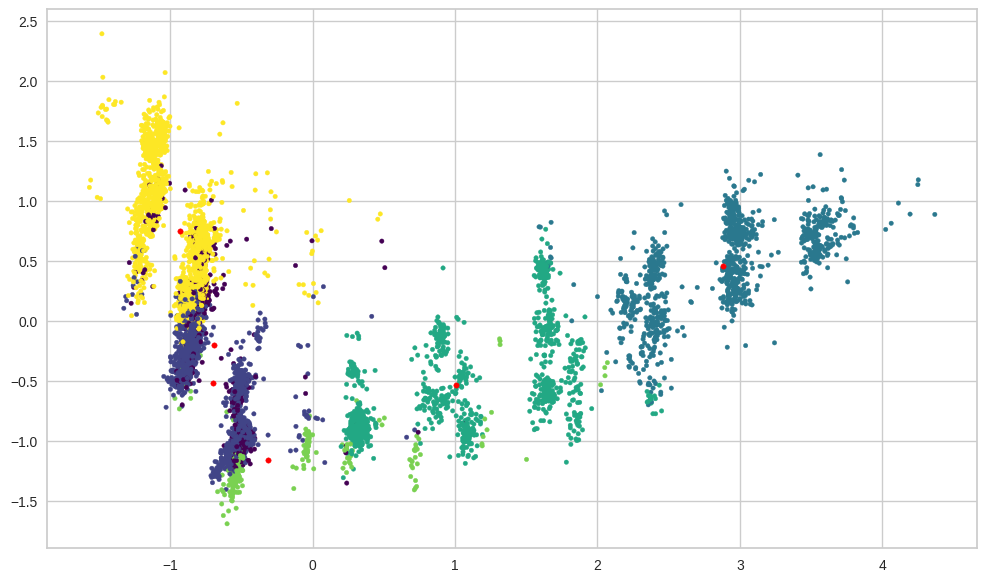

In [ ]:
# Plotting the results:
cluster_centroids = best_model.cluster_centers_
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, s=10, cmap='viridis')
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], c='red', s=15)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

While I applied GridSearchCV to tune the KMeans algorithm, optimizing parameters like n_clusters, max_iter, and tol, I did not observe any significant improvement in the clustering performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I haven't found any improvement

### ML Model - 2

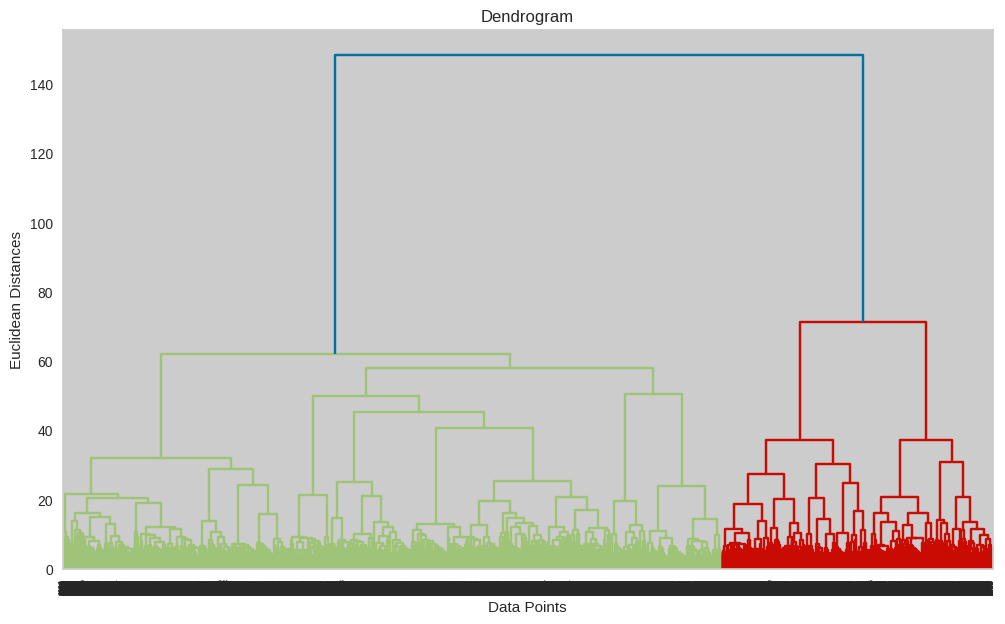

In [ ]:
# Visualizing evaluation Metric Score chart
import scipy.cluster.hierarchy as sci
#finding the optimal number of clusters and largest vertical distance without crossing any other horizontal line using the dendrogram
hierarchical_linkage = sci.linkage(X_reduced, method='ward')
dendrogram = sci.dendrogram(hierarchical_linkage)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

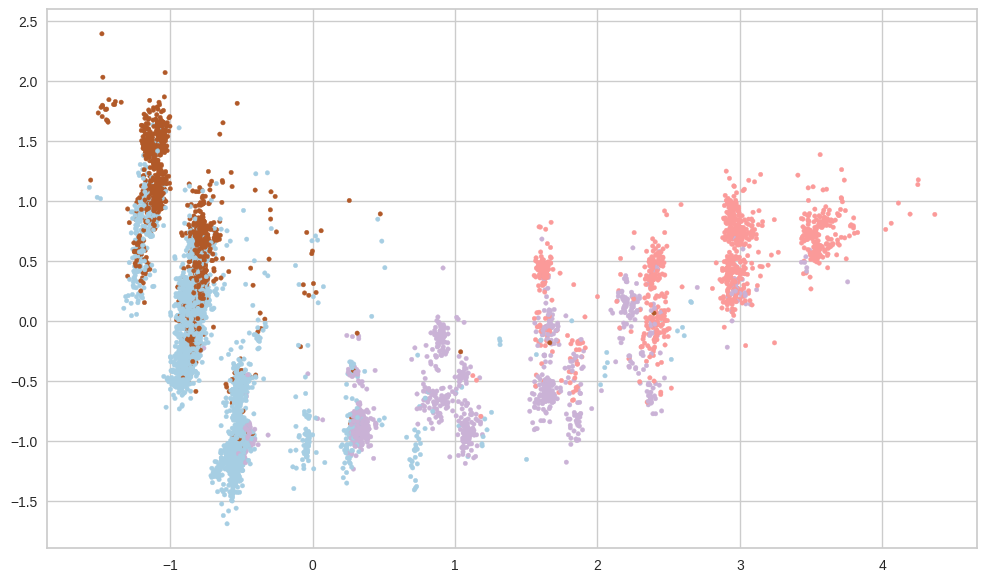

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Fitting hierarchical clustering to the dataset
# 'affinity' is not needed when using 'ward' linkage.
hierarchical_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels_hc = hierarchical_clustering.fit_predict(X_reduced)

# Plotting the results:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels_hc, s=10, cmap='Paired')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The hierarchical clustering algorithm was used. This unsupervised machine learning model groups data points into a tree-like structure based on their similarity.Due to the presence of noise in the dataset, the results are not ideal. However, for n_clusters = 4, the clustering appears reasonable and better than other configurations.

### ML Model - 3

In [ ]:
from sklearn.cluster import DBSCAN
# ML Model - 3 Implementation
dbscan = DBSCAN(eps=.91,min_samples=15,algorithm='auto')
# Fit the Algorithm
dbscan.fit(X_reduced)
# Predict on the model
predicted_labels = dbscan.fit_predict(X_reduced)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

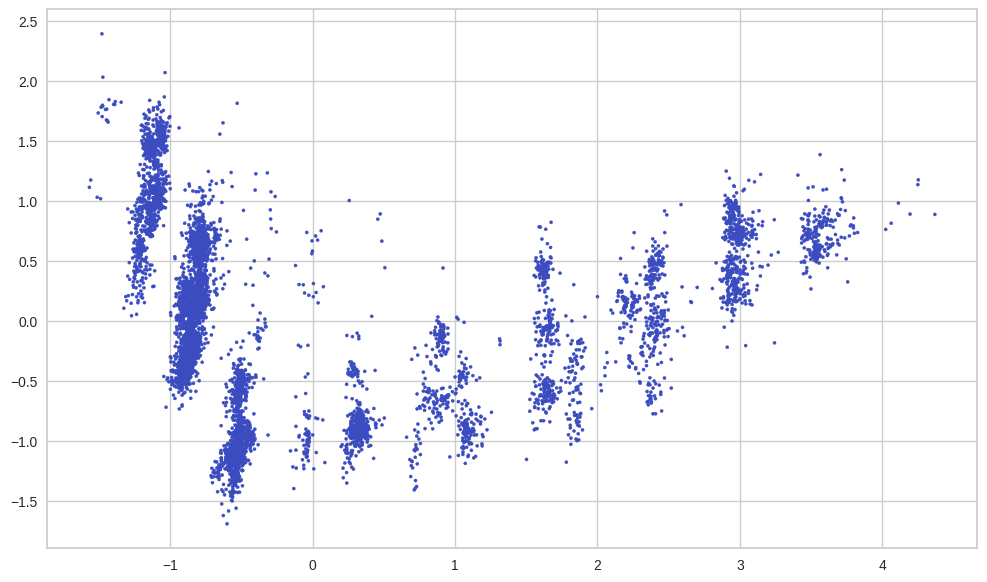

In [ ]:
# Visualizing evaluation Metric Score chart
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=predicted_labels,s=5,cmap='coolwarm')
plt.show()

DBSCAN, a density-based clustering model, was used. It struggled with high noise, forming one large cluster and a few small ones, making it less effective for this dataset.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Euclidean distance was chosen to measure the closeness of points in a multidimensional space, critical for clustering.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

KMeans is a good choice for its speed and better clustering results, outperforming DBSCAN in handling noise and providing meaningful clusters.

# **Conclusion**

* Dataset Overview:

  * The dataset consists of 7787 rows and 12 columns.
* Missing Values:

  * Director column: 2389 missing values (30.68% of entries)
  * Cast column: 718 missing values (9.22%)
  * Country column: 507 missing values (6.51%)
  * Date_added column: Only 10 missing values (0.13%)
* Feature Engineering:

  * After vectorization, the dataset was expanded to 46,370 features.
  * Post stemming, the number of features was reduced to 39,864.
* Dimensionality Reduction:

  * After applying dimensionality reduction techniques, the feature set was further condensed to 353 features.
* Cluster Analysis:

  * Based on the KElbow visualization, the optimal number of clusters is 6, where the curve flattens, indicating minimal benefit from increasing the number of clusters.
  * The Silhouette score at n_clusters = 6 is 0.046, suggesting a reasonable level of cluster cohesion and separation.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***